In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz 

## Load data

In [2]:
df = pd.read_csv("data/titanic_train.csv")

In [3]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
def data_preprocess(df):
    # Treat None as a category
    # df.loc[df['Embarked'].isna(), 'Embarked'] = 'U'
    # Feature Preprocessing
    del df['PassengerId']
    del df['Name']
    del df['Ticket']
    del df['Cabin']
    del df['Age']
    #df.dropna(inplace=True)
    d_sex={}
    d_sex['male'] = 1
    d_sex['female'] = 0

    #d_embarked = {}
    #d_embarked['S'] = 0
    #d_embarked['C'] = 1
    #d_embarked['Q'] = 2
    #d_embarked['U'] = 3

    df['Sex'] = df['Sex'].apply(d_sex.get)
    df['Sex'] = df['Sex'].astype(int)
    #df['Embarked'] = df['Embarked'].apply(d_embarked.get)
    #df['Embarked'] = df['Embarked'].astype(int)
    return df

In [6]:
df = data_preprocess(df)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(1), int32(1), int64(4), object(1)
memory usage: 45.4+ KB


In [8]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,1,1,0,7.2500,S
1,1,1,0,1,0,71.2833,C
2,1,3,0,0,0,7.9250,S
3,1,1,0,1,0,53.1000,S
4,0,3,1,0,0,8.0500,S


In [9]:
display(df['Pclass'].unique())
display(df['Sex'].unique())
display(df['SibSp'].unique())
display(df['Parch'].unique())
#display(df['Fare'].unique())
display(df['Embarked'].unique())

array([3, 1, 2], dtype=int64)

array([1, 0])

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

array(['S', 'C', 'Q', nan], dtype=object)

In [10]:
def one_hot(df):
    df['Pclass_1'] = 0
    df['Pclass_2'] = 0
    df['Pclass_3'] = 0
    df.loc[df['Pclass']==1, 'Pclass_1'] = 1
    df.loc[df['Pclass']==2, 'Pclass_2'] = 1
    df.loc[df['Pclass']==3, 'Pclass_3'] = 1
    # SibSp
    for i in range(9):
        df[f'SibSp_{i}'] = 0
        df.loc[df['SibSp']==i, f'SibSp_{i}'] = 1
    # Parch
    for i in range(7):
        df[f'Parch_{i}'] = 0
        df.loc[df['Parch']==i, f'Parch_{i}'] = 1
    # Embarked
    df[f'Embarked_S'] = 0
    df[f'Embarked_C'] = 0
    df[f'Embarked_Q'] = 0
        
    df.loc[df['Embarked']=='S', 'Embarked_S'] = 1
    df.loc[df['Embarked']=='C', 'Embarked_C'] = 1
    df.loc[df['Embarked']=='Q', 'Embarked_Q'] = 1
    return df

In [11]:
df = one_hot(df)

In [12]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Pclass_1,Pclass_2,Pclass_3,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_S,Embarked_C,Embarked_Q
0,0,3,1,1,0,7.2500,S,0,0,1,...,1,0,0,0,0,0,0,1,0,0
1,1,1,0,1,0,71.2833,C,1,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,3,0,0,0,7.9250,S,0,0,1,...,1,0,0,0,0,0,0,1,0,0
3,1,1,0,1,0,53.1000,S,1,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0,3,1,0,0,8.0500,S,0,0,1,...,1,0,0,0,0,0,0,1,0,0


In [13]:
df_binaries = df.drop(columns=['Survived', 'Fare', 'Pclass', 'SibSp', 'Parch', 'Embarked'], axis=1)

In [14]:
df_binaries.head()

,Sex,Pclass_1,Pclass_2,Pclass_3,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_S,Embarked_C,Embarked_Q
0,1,0,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,0,0,0,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,1,0,0,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [15]:
binary_features = df_binaries.columns

In [16]:
n_binaries = df_binaries.shape[1]

In [17]:
binary_values = df_binaries.values

In [18]:
# Create the graph
graph = np.zeros((n_binaries, n_binaries))

In [19]:
for i in range(n_binaries):
    fi = binary_values[:, i]
    for j in range(i, n_binaries):
        fj = binary_values[:, j]
        fij=fi*fj
        count = np.sum(fij>0)
        graph[i, j] = count
        graph[j, i] = count

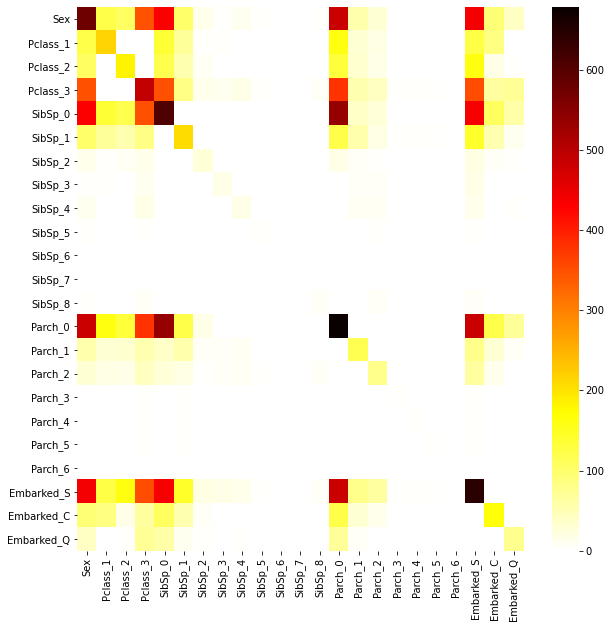

In [20]:
fig = plt.figure(figsize=(10, 10))
#plt.imshow(graph, cmap=plt.cm.hot_r)
sns.heatmap(graph, xticklabels=binary_features, yticklabels=binary_features, cmap=plt.cm.hot_r)

plt.show()

In [21]:
degrees = graph.sum(axis=0)

In [22]:
df_degrees = pd.DataFrame()
df_degrees['feature'] = binary_features
df_degrees['degree'] = degrees
df_degrees=df_degrees.sort_values(by='degree')
df_degrees

,feature,degree
11,SibSp_7,0.0
10,SibSp_6,0.0
19,Parch_6,4.0
17,Parch_4,18.0
18,Parch_5,21.0
16,Parch_3,21.0
9,SibSp_5,24.0
12,SibSp_8,32.0
7,SibSp_3,69.0
8,SibSp_4,84.0


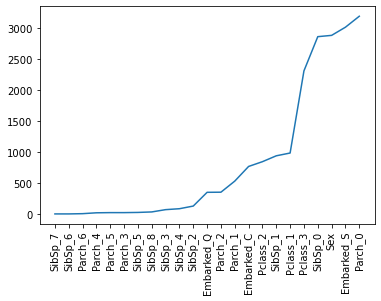

In [23]:
plt.plot(df_degrees['degree'].values)
plt.xticks(list(range(df_degrees.shape[0])), df_degrees['feature'].values, rotation=90)
plt.show()

In [24]:
ordered_features = df_degrees['feature'].values

In [25]:
class Bundle():
    feature_names = []
    n_conflicts = 0
    occupied_places=np.array([])
    
    
    def __init__(self):
        self.feature_names = []
        self.occupied_places=None
        
        pass
    
    def add(self, feature_name, feature_value):
        self.feature_names.append(feature_name)
        
        
        if self.occupied_places is None:
            self.occupied_places = (feature_value > 0) * 1
        else:
            self.n_conflicts = np.sum((self.occupied_places * feature_value)>0)
            self.occupied_places = ((self.occupied_places + feature_value)>0) * 1
            

    def conflict_count(self, f):
        cc=np.sum(self.occupied_places * f>0)
        return cc
 
    def get_n_occupied_places(self):
        return np.sum(self.occupied_places)
    
    def generate_feature(self, df_binaries):
        n_features = len(self.feature_names)
        n_samples = len(self.occupied_places)
        bv = np.zeros((n_samples))
        for f in range(n_features):
            fv = df_binaries[self.feature_names[f]].values * (f+1)
            bv = bv*(bv>=fv) + fv*(fv>bv)
        return bv

In [26]:
bundles = []
max_conflict_count=5

for i in range(len(ordered_features)):
    need_new = True
    
    for j in range(len(bundles)):
        conflict_count = bundles[j].conflict_count(df_binaries[ordered_features[i]].values)
        
        if conflict_count<max_conflict_count:
            bundles[j].add(ordered_features[i], df_binaries[ordered_features[i]].values)
            need_new=False
            break
    
    if need_new:
        b = Bundle()
        b.add(ordered_features[i], df_binaries[ordered_features[i]].values)
        bundles.append(b)

In [27]:
for b in bundles:
    print(b.feature_names)
    print(b.n_conflicts)

['SibSp_7', 'SibSp_6', 'Parch_6', 'Parch_4', 'Parch_5', 'Parch_3', 'SibSp_5', 'SibSp_8', 'SibSp_3', 'SibSp_4', 'SibSp_2', 'SibSp_0']
4
['Embarked_Q', 'Parch_2']
1
['Parch_1', 'Parch_0']
0
['Embarked_C', 'Embarked_S']
0
['Pclass_2', 'Pclass_1', 'Pclass_3']
0
['SibSp_1']
0
['Sex']
0


In [28]:
discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='kmeans')

In [29]:
new_fare=discretizer.fit_transform(df['Fare'].values.reshape((-1, 1)))

In [30]:
df['Fare'] = new_fare

## Merge Exclusive Features

In [31]:
df_bundles = pd.DataFrame()

In [32]:
for i in range(len(bundles)):
    df_bundles[f'b{i}'] = bundles[i].generate_feature(df_binaries)
    df_bundles[f'b{i}'] = df_bundles[f'b{i}'].astype(int)

In [33]:
df_bundles

,b0,b1,b2,b3,b4,b5,b6
0,0,0,2,2,3,1,1
1,0,0,2,1,2,1,0
2,12,0,2,2,3,0,0
3,0,0,2,2,2,1,0
4,12,0,2,2,3,0,1
...,...,...,...,...,...,...,...
886,12,0,2,2,1,0,1
887,12,0,2,2,2,0,0
888,0,2,0,2,3,1,0
889,12,0,2,1,2,0,1


In [34]:
df_features = df_bundles.copy()
df_features['fare'] = df['Fare']
df_features['fare'] = df_features['fare'].astype(int)
df_features.head()

,b0,b1,b2,b3,b4,b5,b6,fare
0,0,0,2,2,3,1,1,0
1,0,0,2,1,2,1,0,3
2,12,0,2,2,3,0,0,0
3,0,0,2,2,2,1,0,2
4,12,0,2,2,3,0,1,0


In [35]:
X = df_features.values
y = df['Survived'].values
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [36]:
df_train = pd.DataFrame(data=X_train, columns=df_features.columns)
df_train['y'] = y_train
df_train

,b0,b1,b2,b3,b4,b5,b6,fare,y
0,12,0,2,2,3,0,0,0,0
1,12,0,2,2,2,0,1,1,1
2,12,0,1,2,2,0,0,7,1
3,12,0,2,1,3,0,1,0,0
4,12,0,2,2,3,0,1,0,0
...,...,...,...,...,...,...,...,...,...
663,12,0,2,2,3,0,1,0,0
664,0,0,2,2,1,1,1,1,0
665,12,0,2,1,3,0,1,0,0
666,12,0,2,2,3,0,1,0,0


In [37]:
feature_names = df_features.columns
n_train = len(y_train)

# LGB Tree

In [38]:
class SplitResult():
    similarity=0
    similarity_gain=0
    i_feature=-1
    split_value=None
    split_quantile=0
    # left
    left_X=None
    left_y=None
    left_y_previous=None
    left_w=None
    left_similarity=0
    left_n=0
    # right
    right_X=None
    right_y=None
    right_y_previous=None
    right_w=None
    right_similarity=0
    right_n=0
    
class Branch:
    no=0
    depth=1
    i_feature=-1
    split_value=0
    split_quantile=0
    similarity=0
    similarity_gain=0
    n_samples=0
    value=[]
    X=None
    y=None
    y_previous=None
    w=None
    
    
    left_branch=None
    right_branch=None
    
    def value(self, _lambda):
        
        return np.sum(self.y * self.w)/(np.sum(self.y_previous * (1 - self.y_previous) * self.w)+_lambda)

    
    def is_leaf(self):
        return self.left_branch is None and self.right_branch is None

In [39]:
def generate_keep(probability, n):
    return probability>np.random.rand(n)

def goss(X, r, p, top_rate=1, keep_rate=1):
    df_tmp = pd.DataFrame(data=X)
    df_tmp['r'] = r
    df_tmp['p'] = p
    df_tmp.sort_values(by=['r'], ascending=False, inplace=True)
    df_tmp['keep'] = generate_keep(keep_rate, df_tmp.shape[0])
    df_tmp['w'] = 1 / keep_rate
    
    top_min = np.quantile(r, top_rate)
    df_tmp.loc[df_tmp['r']>top_min, 'keep'] = True
    df_tmp.loc[df_tmp['r']>top_min, 'w'] = 1
    
    df_tmp = df_tmp[df_tmp['keep']==True]
    X_train_goss = df_tmp.drop(['r','p','w'], axis=1).values
    #y_train_goss = df_tmp['y'].values
    r_train_goss = df_tmp['r'].values
    p_train_goss = df_tmp['p'].values
    w_train_goss = df_tmp['w'].values
    
    return X_train_goss, r_train_goss, p_train_goss, w_train_goss

In [40]:
from sklearn.metrics import r2_score
class LGBTree():
    
    _lambda=1
    node_number=0
    the_tree=None
    max_depth=3
    gamma=2
    colsample_bynode=1.0
    
    def __init__(self, max_depth=3, _lambda=1, gamma=2, colsample_bynode=1.0):
        
        self.max_depth = max_depth
        self._lambda =_lambda
        self.gamma = gamma
        self.colsample_bynode = colsample_bynode

    def get_similarity(self, y, y_previous, w):
        #a=np.array(a)
        sim=np.sum(y * w)**2/(np.sum(y_previous * (1-y_previous) * w)+self._lambda)

        return sim
    
    def get_colsample_bynode_indics(self, n_features):
        if n_features==1:
            return [1]

        if self.colsample_bynode>1:
            raise ValueError("colsample_bynode must be smaller than or equal to 1.0")

        n_selected_features=int(self.colsample_bynode * n_features)
        if n_selected_features==n_features:
            return list(range(n_features))


        old_list=list(range(n_features))
        new_list=[]
        for i in range(n_selected_features):
            selected = random.choice(old_list)
            while selected in new_list:
                selected = random.choice(old_list)
            new_list.append(selected)
        return new_list
    
    def find_best_split(self, X, y, y_previous, w):
        n_features=X.shape[1]
        best_sr=SplitResult()
        # colsample_bynode
        selected_features = self.get_colsample_bynode_indics(n_features)
        for i_feature in selected_features:
            f=X[:,i_feature]
            for split_value in range(1, int(np.max(f))):
                sr = SplitResult()
                sr.i_feature=i_feature
                condition = f<split_value
                #print(condition)
                # left
                sr.left_y = y[condition]
                sr.left_y_previous=y_previous[condition]
                sr.left_w = w[condition]
                sr.left_n = len(sr.left_y)
                if sr.left_n == 0:
                    continue
                sr.left_similarity = self.get_similarity(sr.left_y, sr.left_y_previous, sr.left_w)

                # right
                sr.right_y = y[~condition]
                sr.right_y_previous=y_previous[~condition]
                sr.right_w = w[~condition]
                sr.right_n = len(sr.right_y)
                if sr.right_n == 0:
                    continue
                sr.right_similarity = self.get_similarity(sr.right_y, sr.right_y_previous, sr.right_w)

                sr.similarity = sr.left_similarity + sr.right_similarity
                #sr.print_me()
                if sr.similarity>best_sr.similarity:
                    best_sr=sr
                    best_sr.left_X = X[condition,:]
                    best_sr.right_X = X[~condition,:]
                    best_sr.split_value = split_value
        return best_sr
    

    def fit_inner(self, X, y, y_previous, w, depth, branch_similarity):
        branch = Branch()
        branch.no=self.node_number
        self.node_number+=1
        branch.similarity=branch_similarity
        branch.n_samples = len(y)
        branch.X=X
        branch.y=y
        branch.y_previous = y_previous
        branch.w = w

        if depth==self.max_depth:
            #print("leaf")

            return branch
        else:
            sr=self.find_best_split(X, y, y_previous, w)
            if sr.i_feature==-1:
                return branch

            sr.similarity_gain=sr.similarity-branch_similarity

            #sr.print_me()
            branch.i_feature=sr.i_feature
            branch.split_value = sr.split_value
            branch.similarity_gain=sr.similarity_gain
            #print("branch")
            branch.left_branch=self.fit_inner(sr.left_X, sr.left_y, sr.left_y_previous, sr.left_w, depth+1, branch_similarity=sr.left_similarity)
            branch.right_branch=self.fit_inner(sr.right_X, sr.right_y, sr.right_y_previous, sr.right_w, depth+1, branch_similarity=sr.right_similarity)

            return branch
        
    def fit(self, X, y, y_previous):
        X_goss, y_goss, y_previous_goss, w = goss(X, y, y_previous)
        self.node_number=0
        similarity=self.get_similarity(y_goss, y_previous_goss, w)
        self.tree=self.fit_inner(X_goss, y_goss, y_previous_goss, w, 0, branch_similarity=similarity)
        
    def prune_inner(self, b: Branch):
        if b.is_leaf():
            return
        self.prune_inner(b.left_branch)
        self.prune_inner(b.right_branch)
        if b.left_branch.is_leaf() and b.right_branch.is_leaf():
            if b.similarity_gain<self.gamma:
                b.left_branch=None
                b.right_branch=None
        
    def prune(self):
        self.prune_inner(self.tree)
        
    def predict_one_inner(self, tree:Branch, x):
        if tree.is_leaf():
            return tree.value(self._lambda)
        if x[tree.i_feature]<tree.split_value:
            return self.predict_one_inner(tree.left_branch, x)
        else:
            return self.predict_one_inner(tree.right_branch, x)

    def predict_inner(self, tree:Branch, X):
        y=[]
        for x in X:
            t=self.predict_one_inner(tree, x)
            y.append(t)
        return np.array(y)

    def predict(self, X):
        return self.predict_inner(self.tree, X)
    
    def score(self, X, y):
        y_hat = self.predict(X)
        return r2_score(y, y_hat)

    def export_graphviz_inner(self, the_branch:Branch, dot_data:str):
        fillcolor = "#ffffff"
        if the_branch.similarity_gain < self.gamma:
            fillcolor = "#ffaaaa"
        if the_branch.similarity_gain < 0:
            fillcolor = "#ff4444"

        if the_branch.is_leaf():
            n_positive = sum(the_branch.y>=0)
            n_negative = sum(the_branch.y<0)
            dot_data += f"{the_branch.no} [label=\"{the_branch.no}\n"+ \
            f"samples={the_branch.n_samples:0.0f}\\n" + \
            f"+/- = {n_positive}/{n_negative}\\n" + \
            f"value={the_branch.value(self._lambda):0.3f}\\n" + \
            f"\", fillcolor=\"#22ee22\"];"
        else:
            dot_data += f"{the_branch.no} [label=\"{the_branch.no}\n"+ \
            f"{feature_names[the_branch.i_feature]} <= {the_branch.split_value:0.0f}\\n" + \
            f"samples = {the_branch.n_samples:0.0f}\\n" + \
            f"sim_gain = {the_branch.similarity_gain:0.3f}\\n" + \
            f"\", fillcolor=\"{fillcolor}\"];"
        #print(branch_str)
        if not the_branch.left_branch is None:
            left_branch=the_branch.left_branch
            if left_branch.no>0:
                dot_data += f"{the_branch.no} -> {left_branch.no} ;"
                dot_data = self.export_graphviz_inner(left_branch, dot_data)
        if not the_branch.right_branch is None:
            right_branch=the_branch.right_branch
            if right_branch.no>0:
                dot_data += f"{the_branch.no} -> {right_branch.no} ;"
                dot_data = self.export_graphviz_inner(right_branch, dot_data)
        return dot_data

    def export_graphviz(self):
        dot_data="""digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;\nedge [fontname=helvetica] ;\n"""
        dot_data+=self.export_graphviz_inner(self.tree, "")
        dot_data+="}"
        dot_data=dot_data.replace("\r\n","\n")
        return dot_data

In [41]:
y_train0 = np.array([0.5] * len(y_train)) 

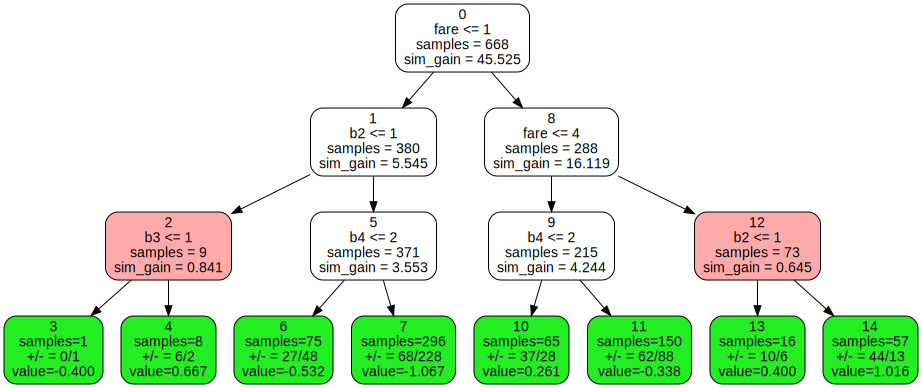

In [42]:
lt = LGBTree()
lt.fit(X_train, y_train-y_train0, y_train0)
dot_data=lt.export_graphviz()
graph = graphviz.Source(dot_data) 
display(graph)

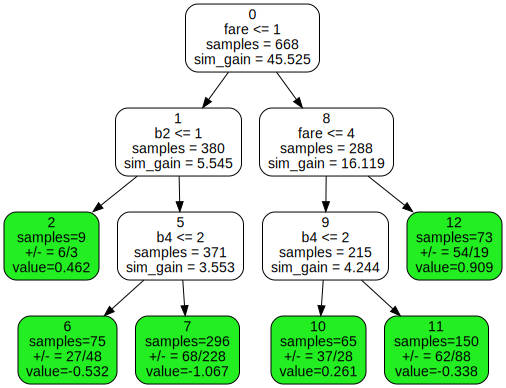

In [43]:
lt.prune()
dot_data=lt.export_graphviz()
graph = graphviz.Source(dot_data) 
display(graph)

## Step 1 Average

In [44]:
#now let's get started
learning_rate=0.3
loss = [0] * 6
residuals = np.zeros([6,n_train])
probabilities = np.zeros([6,n_train])
predictions = np.zeros([6,n_train])
log_of_odds = np.zeros([6,n_train])
gamma = np.zeros([6,n_train])
log_of_odds[0] = [0] * n_train
#calculation
#average_y=y.mean()
probabilities[0] = [0.5] * n_train
predictions[0] = [1] * n_train
residuals[0] = y_train - probabilities[0]
df_display=pd.DataFrame()
df_display['y'] = y_train
df_display['$f_0$']=np.array(predictions[0]).reshape((-1, 1))
df_display['$r_0$']=np.array(residuals[0]).reshape((-1, 1))
display(df_train)
loss0=-(y_train*np.log(probabilities[0])+(1-y_train)*np.log(1-probabilities[0]))
loss[0] = np.sum(loss0) / n_train
print(loss[0])
trees = []

,b0,b1,b2,b3,b4,b5,b6,fare,y
0,12,0,2,2,3,0,0,0,0
1,12,0,2,2,2,0,1,1,1
2,12,0,1,2,2,0,0,7,1
3,12,0,2,1,3,0,1,0,0
4,12,0,2,2,3,0,1,0,0
...,...,...,...,...,...,...,...,...,...
663,12,0,2,2,3,0,1,0,0
664,0,0,2,2,1,1,1,1,0
665,12,0,2,1,3,0,1,0,0
666,12,0,2,2,3,0,1,0,0


0.6931471805599453


In the first step, we calculate the average 71.2 as the initial prediction. The pseudo residuals are 16.8, 4.8, etc.

## Step 2 For Loop

In [45]:
def iterate(i):
    
    t = LGBTree(max_depth=3, gamma=5)
    t.fit(X_train, residuals[i], probabilities[i])
    trees.append(t)
    
    dot_data = t.export_graphviz()
    graph = graphviz.Source(dot_data) 
    display(graph)
    t.prune()
    dot_data = t.export_graphviz()
    graph = graphviz.Source(dot_data) 
    display(graph)
    #next prediction, residual
    gamma[i]=t.predict(X_train)
    log_of_odds[i+1] = log_of_odds[i] + 0.3 * gamma[i]
    probabilities[i+1] = np.array([np.exp(odds)/(np.exp(odds)+1) for odds in log_of_odds[i+1]])
    predictions[i+1] = (probabilities[i+1]>0.5)*1.0
    residuals[i+1]=y_train-probabilities[i+1]
    loss[i+1]=np.sum(-y_train * log_of_odds[i+1] + np.log(1+np.exp(log_of_odds[i+1])))
    loss[i+1]=loss[i+1]/n_train
    y_hat=t.predict(X_train)
    
    
    
    new_df=df_train[['y','y']].copy()
    #new_df.columns=['name', 'popcorn','age','color','y']
    new_df[f'$p_{i}$']=probabilities[i]
    new_df[f'$l_{i}$']=log_of_odds[i]
    new_df[f'$r_{i}$']=residuals[i]
    new_df[f'$\gamma_{i}$']=gamma[i]
    new_df[f'$l_{i+1}$']=log_of_odds[i+1]
    new_df[f'$p_{i+1}$']=probabilities[i+1]
    display(new_df)
    
    #df_train[f'$\gamma_{i+1}$']=y_hat.reshape((-1,1))
    #df_train[f'$f_{i+1}$']=np.array(prediction[i+1]).reshape((-1,1))
    #df_train[f'$r_{i+1}$']=np.array(residuals[i+1]).reshape((-1,1))

    

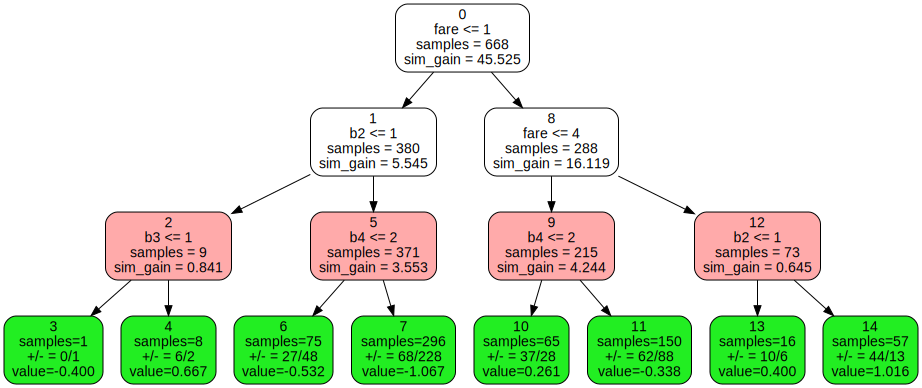

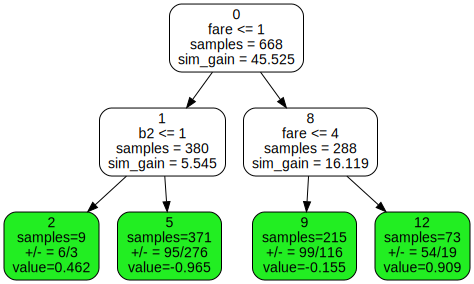

,y,y,$p_0$,$l_0$,$r_0$,$\gamma_0$,$l_1$,$p_1$
0,0,0,0.5,0.0,-0.5,-0.965333,-0.289600,0.428102
1,1,1,0.5,0.0,0.5,-0.155251,-0.046575,0.488358
2,1,1,0.5,0.0,0.5,0.909091,0.272727,0.567762
3,0,0,0.5,0.0,-0.5,-0.965333,-0.289600,0.428102
4,0,0,0.5,0.0,-0.5,-0.965333,-0.289600,0.428102
...,...,...,...,...,...,...,...,...
663,0,0,0.5,0.0,-0.5,-0.965333,-0.289600,0.428102
664,0,0,0.5,0.0,-0.5,-0.155251,-0.046575,0.488358
665,0,0,0.5,0.0,-0.5,-0.965333,-0.289600,0.428102
666,0,0,0.5,0.0,-0.5,-0.965333,-0.289600,0.428102


In [46]:
iterate(0)

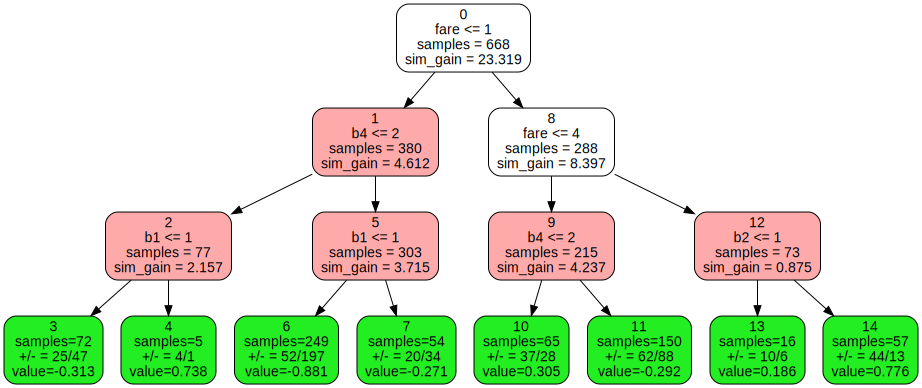

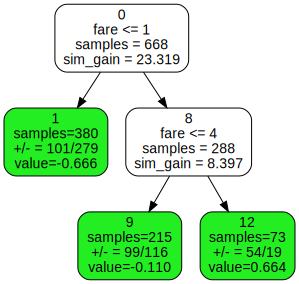

,y,y,$p_1$,$l_1$,$r_1$,$\gamma_1$,$l_2$,$p_2$
0,0,0,0.428102,-0.289600,-0.428102,-0.665843,-0.489353,0.380046
1,1,1,0.488358,-0.046575,0.511642,-0.109593,-0.079453,0.480147
2,1,1,0.567762,0.272727,0.432238,0.663679,0.471831,0.615817
3,0,0,0.428102,-0.289600,-0.428102,-0.665843,-0.489353,0.380046
4,0,0,0.428102,-0.289600,-0.428102,-0.665843,-0.489353,0.380046
...,...,...,...,...,...,...,...,...
663,0,0,0.428102,-0.289600,-0.428102,-0.665843,-0.489353,0.380046
664,0,0,0.488358,-0.046575,-0.488358,-0.109593,-0.079453,0.480147
665,0,0,0.428102,-0.289600,-0.428102,-0.665843,-0.489353,0.380046
666,0,0,0.428102,-0.289600,-0.428102,-0.665843,-0.489353,0.380046


In [47]:
iterate(1)

In iteration 1, we firstly train a tree using residuals_1. This tree tells us height is also important in determining weight. Whose who are less than 1.55 meters are supported to lose -7.289 and the other to gain 7.289. Again, we want to shrink this to 20%, which is -1.4578 and 1.4578. We then make prediction_2 based on prediction_1 and $\gamma$. We see Alex gains 1.4578 kg because he is 1.6. Others also gain or lose weight because of the new rule.

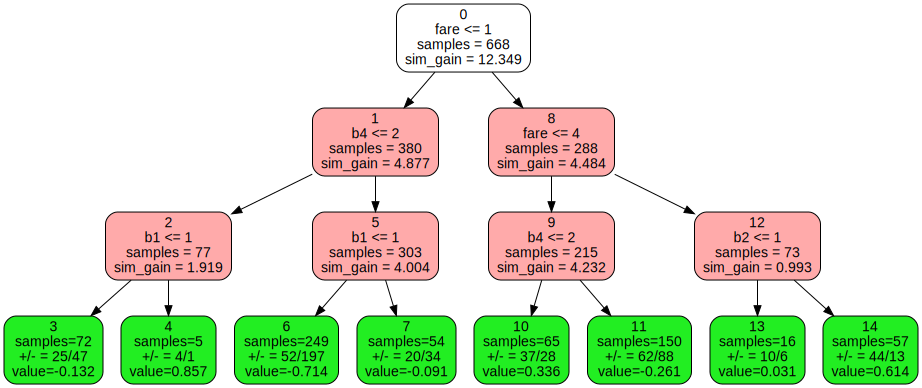

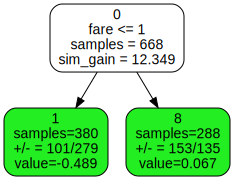

,y,y,$p_2$,$l_2$,$r_2$,$\gamma_2$,$l_3$,$p_3$
0,0,0,0.380046,-0.489353,-0.380046,-0.489294,-0.636141,0.346119
1,1,1,0.480147,-0.079453,0.519853,0.066917,-0.059378,0.485160
2,1,1,0.615817,0.471831,0.384183,0.066917,0.491906,0.620555
3,0,0,0.380046,-0.489353,-0.380046,-0.489294,-0.636141,0.346119
4,0,0,0.380046,-0.489353,-0.380046,-0.489294,-0.636141,0.346119
...,...,...,...,...,...,...,...,...
663,0,0,0.380046,-0.489353,-0.380046,-0.489294,-0.636141,0.346119
664,0,0,0.480147,-0.079453,-0.480147,0.066917,-0.059378,0.485160
665,0,0,0.380046,-0.489353,-0.380046,-0.489294,-0.636141,0.346119
666,0,0,0.380046,-0.489353,-0.380046,-0.489294,-0.636141,0.346119


In [48]:
iterate(2)

Iteration 2 again tells us that gender matters.

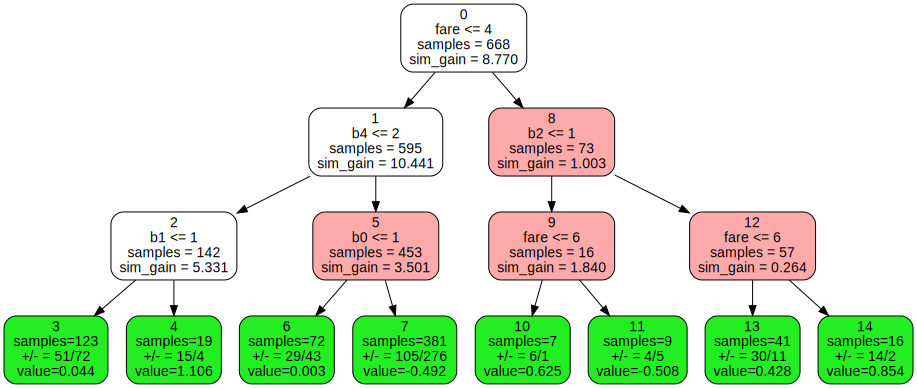

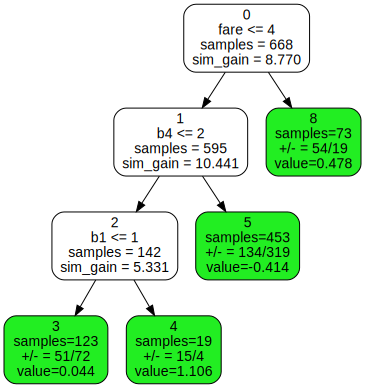

,y,y,$p_3$,$l_3$,$r_3$,$\gamma_3$,$l_4$,$p_4$
0,0,0,0.346119,-0.636141,-0.346119,-0.413871,-0.760303,0.318581
1,1,1,0.485160,-0.059378,0.514840,-0.413871,-0.183540,0.454243
2,1,1,0.620555,0.491906,0.379445,0.478280,0.635390,0.653711
3,0,0,0.346119,-0.636141,-0.346119,-0.413871,-0.760303,0.318581
4,0,0,0.346119,-0.636141,-0.346119,-0.413871,-0.760303,0.318581
...,...,...,...,...,...,...,...,...
663,0,0,0.346119,-0.636141,-0.346119,-0.413871,-0.760303,0.318581
664,0,0,0.485160,-0.059378,-0.485160,0.044492,-0.046031,0.488494
665,0,0,0.346119,-0.636141,-0.346119,-0.413871,-0.760303,0.318581
666,0,0,0.346119,-0.636141,-0.346119,-0.413871,-0.760303,0.318581


In [49]:
iterate(3)

Iteration 3 argues that height is important, too.

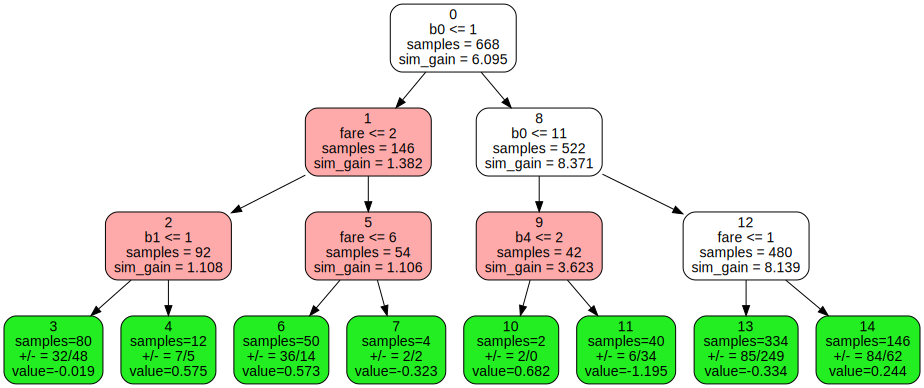

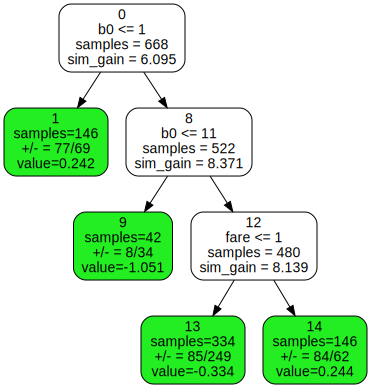

,y,y,$p_4$,$l_4$,$r_4$,$\gamma_4$,$l_5$,$p_5$
0,0,0,0.318581,-0.760303,-0.318581,-0.333904,-0.860474,0.297240
1,1,1,0.454243,-0.183540,0.545757,0.243784,-0.110404,0.472427
2,1,1,0.653711,0.635390,0.346289,0.243784,0.708525,0.670075
3,0,0,0.318581,-0.760303,-0.318581,-0.333904,-0.860474,0.297240
4,0,0,0.318581,-0.760303,-0.318581,-0.333904,-0.860474,0.297240
...,...,...,...,...,...,...,...,...
663,0,0,0.318581,-0.760303,-0.318581,-0.333904,-0.860474,0.297240
664,0,0,0.488494,-0.046031,-0.488494,0.241519,0.026425,0.506606
665,0,0,0.318581,-0.760303,-0.318581,-0.333904,-0.860474,0.297240
666,0,0,0.318581,-0.760303,-0.318581,-0.333904,-0.860474,0.297240


In [50]:
iterate(4)

Let's stop at Iteration 4. And take a look at the loss.

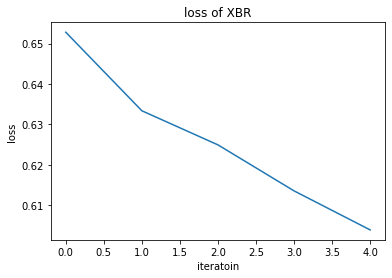

In [51]:
plt.plot(loss[1:])
plt.title('loss of XBR')
plt.xlabel('iteratoin')
plt.ylabel('loss')
plt.show()

In [58]:
class LGBClassifier():
    
    n_estimators = 100
    
    #now let's get started
    learning_rate=0.3
    trees = []
    loss = []
    residuals = np.zeros([100,n_train])
    probabilities = np.zeros([100,n_train])
    predictions = np.zeros([100,n_train])
    log_of_odds = np.zeros([100,n_train])
    gamma = np.zeros([100,n_train])
    log_of_odds[0] = [0] * n_train
    
    
    def __init__(self, n_estimators=100):
        self.n_estimators = n_estimators
        pass
    
    def iterate(self, i, X_train, y_train):
        n_train=len(y_train)
        t = LGBTree(max_depth=3, gamma=5)
        t.fit(X_train,self.residuals[i], self.probabilities[i])
        t.prune()
        self.trees.append(t)
        

        self.gamma[i]=t.predict(X_train)
        self.log_of_odds[i+1] = self.log_of_odds[i] + 0.3 * self.gamma[i]
        self.probabilities[i+1] = np.array([np.exp(odds)/(np.exp(odds)+1) for odds in self.log_of_odds[i+1]])
        self.predictions[i+1] = (self.probabilities[i+1]>0.5)*1.0
        self.residuals[i+1]=y_train-self.probabilities[i+1]
        _loss=np.sum(-y_train * self.log_of_odds[i+1] + np.log(1+np.exp(self.log_of_odds[i+1])))/n_train
        self.loss.append(_loss)

    def fit(self, X_train, y_train):
        n_train=len(y_train)
        #n_estimators=10
        #now let's get started
        self.learning_rate=0.3
        self.loss = []
        self.trees = []
        self.residuals = np.zeros([self.n_estimators+1, n_train])
        self.probabilities = np.zeros([self.n_estimators+1, n_train])
        self.predictions = np.zeros([self.n_estimators+1, n_train])
        self.log_of_odds = np.zeros([self.n_estimators+1, n_train])
        self.gamma = np.zeros([self.n_estimators+1, n_train])
        self.log_of_odds[0] = [0] * n_train
        self.probabilities[0] = [0.5] * n_train
        self.predictions[0] = [1] * n_train
        self.residuals[0] = y_train - probabilities[0]
        loss0=-(y_train*np.log(probabilities[0])+(1-y_train)*np.log(1-probabilities[0]))
        loss0 = np.sum(loss0) / n_train
        self.loss.append(loss0)
        
        for i in range(self.n_estimators):
            self.iterate(i, X_train, y_train)

    def predict_proba(self, X):
        X = np.array(X)
        log_of_odds = np.array([0.0] * X.shape[0])
        for t in self.trees:
            log_of_odds+=t.predict(X)
        results = np.array([np.exp(odds)/(np.exp(odds)+1) for odds in log_of_odds])
        return results
    
    def predict(self, X):
        proba = self.predict_proba(X)
        results = (proba>0.5) * 1.0
        return results
    
    def accuracy(self, X, y):
        n=len(y)
        y_hat = self.predict(X)
        right = np.sum(y_hat == y)
        return right/n * 1.0

In [59]:
model = LGBClassifier(n_estimators=20)

In [60]:
model.fit(X_train, y_train)

In [61]:
model.accuracy(X_train, y_train)

0.6976047904191617

In [62]:
model.accuracy(X_test, y_test)

0.6636771300448431

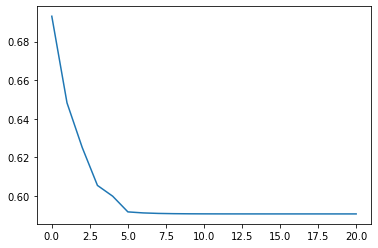

In [63]:
plt.plot(model.loss)

In [64]:
model.loss

[0.6931471805599453,
 0.6482120953057027,
 0.6250549842348821,
 0.6053988223232072,
 0.5998176093406533,
 0.5916701824220582,
 0.5911402487405213,
 0.5908771438768804,
 0.5907467618082235,
 0.5906822457571622,
 0.5906503570852505,
 0.5906346081617332,
 0.5906268348071715,
 0.5906229996628869,
 0.5906211080882412,
 0.5906201753238097,
 0.5906197154332583,
 0.5906194887129463,
 0.5906193769511016,
 0.5906193218609966,
 0.5906192947067729]